# Logistic Regression Model Grid Search

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Modules:" data-toc-modified-id="Import-Modules:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Modules:</a></span></li><li><span><a href="#Import-Data:" data-toc-modified-id="Import-Data:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Data:</a></span></li><li><span><a href="#Set-up-Model-and-Gridsearch:" data-toc-modified-id="Set-up-Model-and-Gridsearch:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Set up Model and Gridsearch:</a></span></li><li><span><a href="#Run-the-Gridsearch:" data-toc-modified-id="Run-the-Gridsearch:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Run the Gridsearch:</a></span></li><li><span><a href="#Save-the-Gridsearch:" data-toc-modified-id="Save-the-Gridsearch:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Save the Gridsearch:</a></span></li><li><span><a href="#Analyse-Gridsearch-Results:" data-toc-modified-id="Analyse-Gridsearch-Results:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Analyse Gridsearch Results:</a></span></li><li><span><a href="#Analyse-Classification-Scores:" data-toc-modified-id="Analyse-Classification-Scores:-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Analyse Classification Scores:</a></span></li></ul></div>

### Import Modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import scikitplot as skplt

### Import Data:

In [3]:
# Filepaths / names:
y1_train_file = '../Data/y1_train_clean_processed.csv'
y1_test_file = '../Data/y1_test_clean_processed.csv'
X1_train_file = '../Data/X1_train_clean_processed.csv'
X1_test_file = '../Data/X1_test_clean_processed.csv'

In [4]:
y1_train = pd.read_csv(y1_train_file)

In [5]:
y1_test = pd.read_csv(y1_test_file)

In [6]:
X1_train = pd.read_csv(X1_train_file)

In [7]:
X1_test = pd.read_csv(X1_test_file)

### Set up Model and Gridsearch:

In [8]:
model2 = LogisticRegression(class_weight='balanced',solver='saga',multi_class='ovr')

In [9]:
params2 = {'C': np.logspace(-5, 5, 15),
          'penalty': ['l1', 'l2','elasticnet'],
          'fit_intercept': [True, False]}

In [10]:
gs_model2 = GridSearchCV(estimator=model2,
                   param_grid=params2,
                   cv=5,
                   scoring='f1_macro',
                   n_jobs=-2,
                   verbose=6,
                   return_train_score=True)

### Run the Gridsearch:

In [11]:
gs_model2.fit(X1_train, y1_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-2)]: Done  91 tasks      | elapsed: 41.5min
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed: 80.2min
[Parallel(n_jobs=-2)]: Done 291 tasks      | elapsed: 137.1min
[Parallel(n_jobs=-2)]: Done 428 tasks      | elapsed: 210.8min
[Parallel(n_jobs=-2)]: Done 450 out of 450 | elapsed: 221.7min finished
C:\Users\jackh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jackh\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          multi_class='ovr', solver='saga'),
             n_jobs=-2,
             param_grid={'C': array([1.00000000e-05, 5.17947468e-05, 2.68269580e-04, 1.38949549e-03,
       7.19685673e-03, 3.72759372e-02, 1.93069773e-01, 1.00000000e+00,
       5.17947468e+00, 2.68269580e+01, 1.38949549e+02, 7.19685673e+02,
       3.72759372e+03, 1.93069773e+04, 1.00000000e+05]),
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='f1_macro', verbose=6)

### Save the Gridsearch:

In [12]:
joblib.dump(gs_model2, '../Model_Save_Files/Logistic_Regression_Grid_Search_2.jlib')

['../Model_Save_Files/Logistic_Regression_Grid_Search_2.jlib']

### Analyse Gridsearch Results:

In [13]:
print(gs_model2.best_estimator_)
print(gs_model2.best_score_)
print(gs_model2.score(X1_train, y1_train))

LogisticRegression(C=19306.977288832535, class_weight='balanced',
                   multi_class='ovr', penalty='l1', solver='saga')
0.5545422880225459
0.5403864881114476


In [14]:
gs_model2.best_params_

{'C': 19306.977288832535, 'fit_intercept': True, 'penalty': 'l1'}

### Analyse Classification Scores:

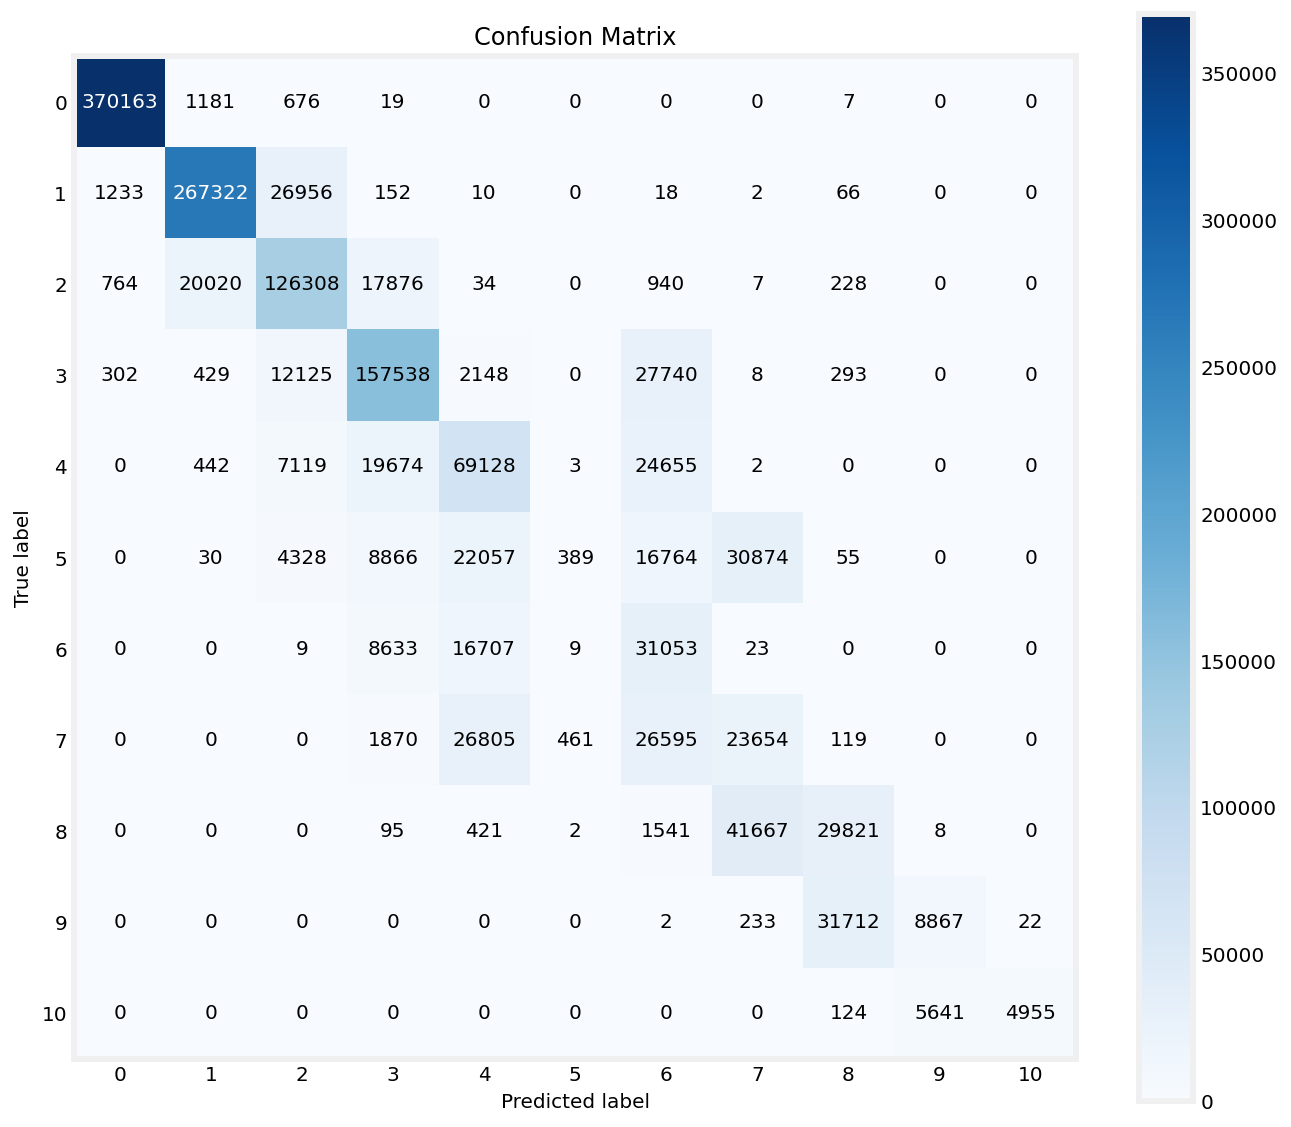

In [15]:
# Confusion Matrix
best_lr = gs_model2.best_estimator_
predictions_test2 = best_lr.predict(X1_test)

skplt.metrics.plot_confusion_matrix(y1_test,predictions_test2,labels=[0,1,2,3,4,5,6,7,8,9,10],figsize=(10,10)) #labels=[0,1,2,3,4,5,6,7,8,9,10],
plt.show()

In [16]:
# Cross Validation Score
cvs2 = cross_val_score(best_lr, X1_test, y1_test, cv=5)
print(cvs2.mean())

C:\Users\jackh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jackh\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\jackh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jackh\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\jackh\Anaconda3\lib\site-packages\sklearn\utils\valid

0.7264999999999999


C:\Users\jackh\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [17]:
# Accuracy, Precision and Recall
predictions_train2 = best_lr.predict(X1_train)

print(classification_report(y1_train, predictions_train2))
print(classification_report(y1_test, predictions_test2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    868106
           1       0.92      0.90      0.91    690106
           2       0.71      0.76      0.73    387747
           3       0.73      0.78      0.76    468026
           4       0.50      0.57      0.53    282387
           5       0.45      0.00      0.01    194514
           6       0.24      0.55      0.33    131678
           7       0.25      0.30      0.27    185511
           8       0.48      0.40      0.44    171628
           9       0.62      0.22      0.32     95284
          10       0.99      0.46      0.63     25013

    accuracy                           0.73   3500000
   macro avg       0.63      0.54      0.54   3500000
weighted avg       0.74      0.73      0.71   3500000

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    372046
           1       0.92      0.90      0.91    295759
           2       0.71 

In [18]:
# Precision Recall and ROC Curves
probabilities2_train = best_lr.predict_proba(X1_train)
probabilities2_test = best_lr.predict_proba(X1_test)

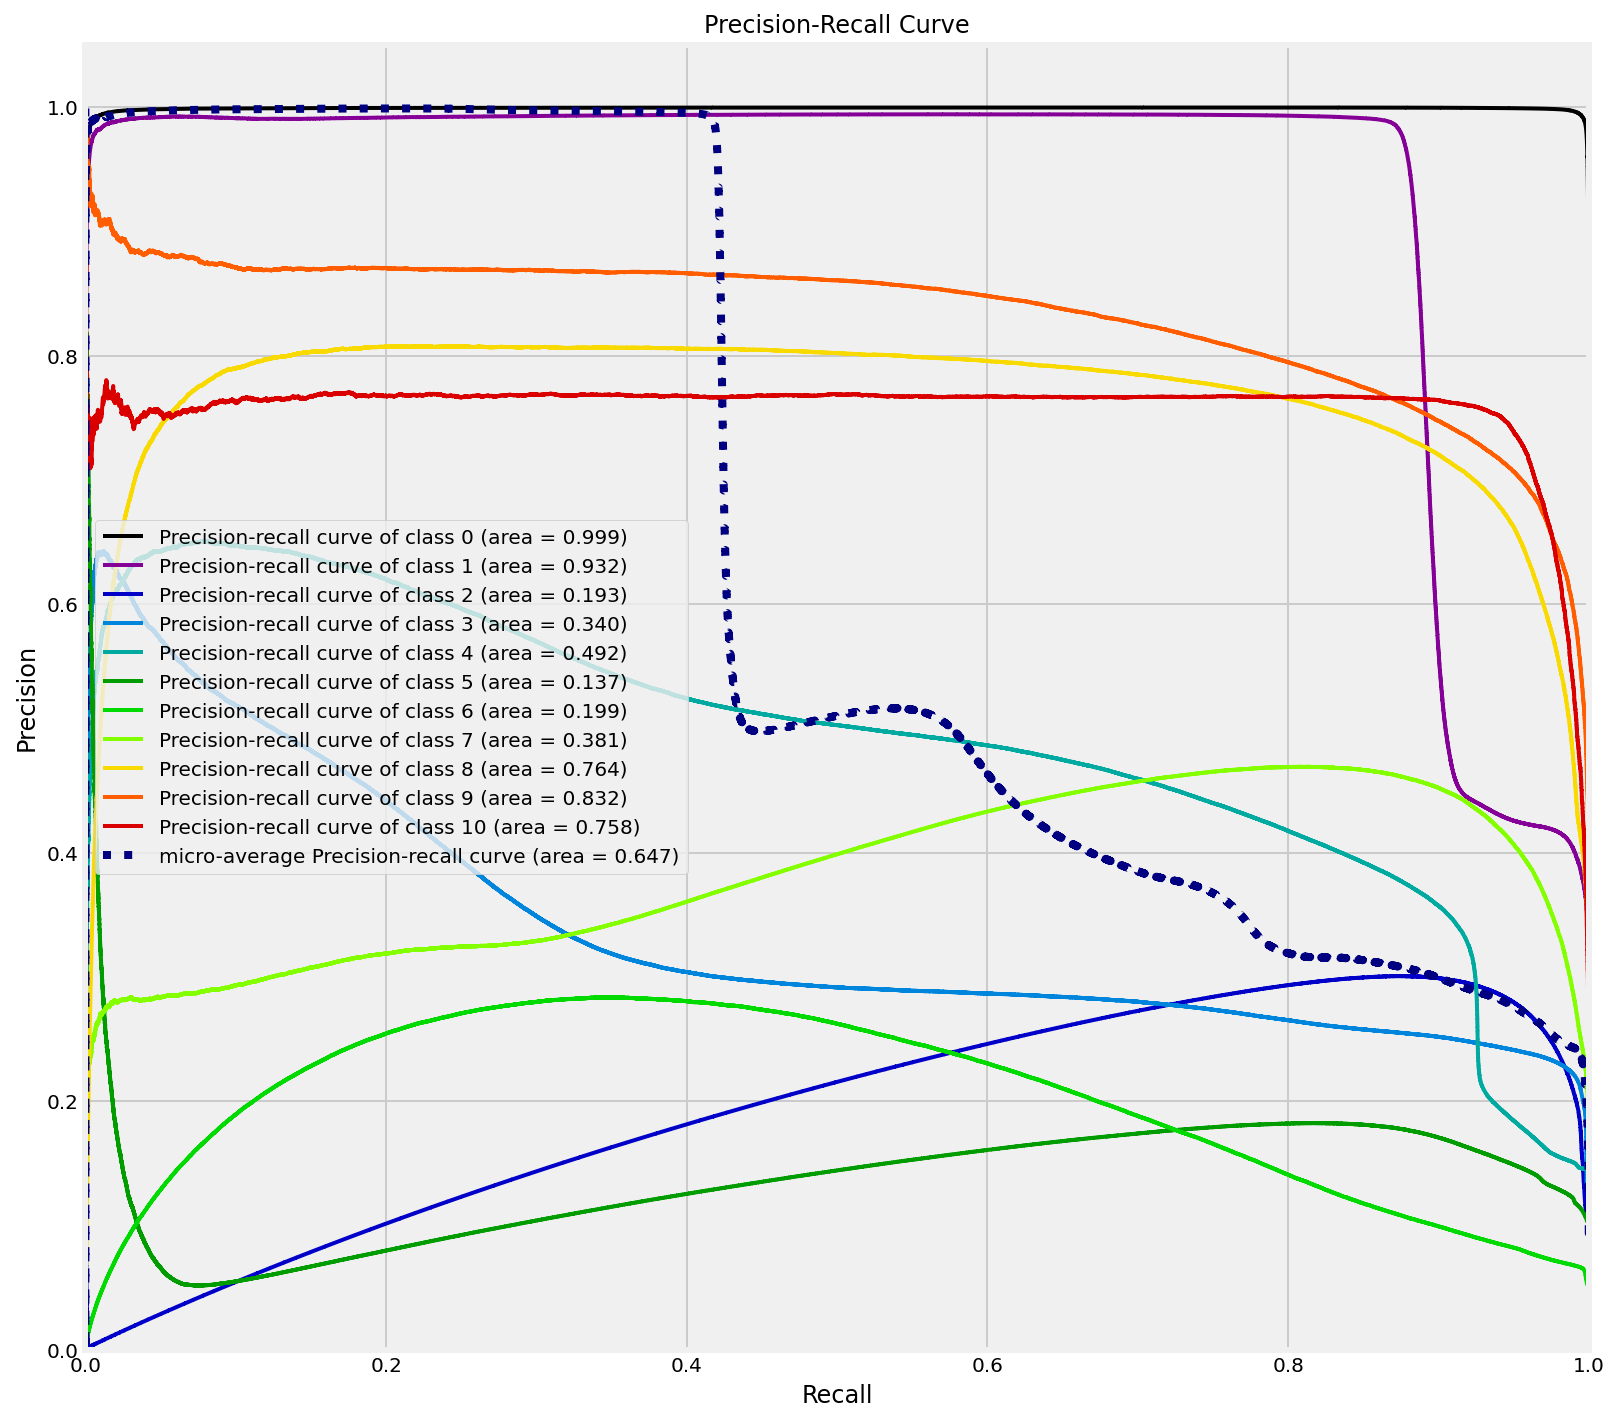

In [19]:
skplt.metrics.plot_precision_recall(y1_train, probabilities2_train,figsize=(12,12))
plt.show()

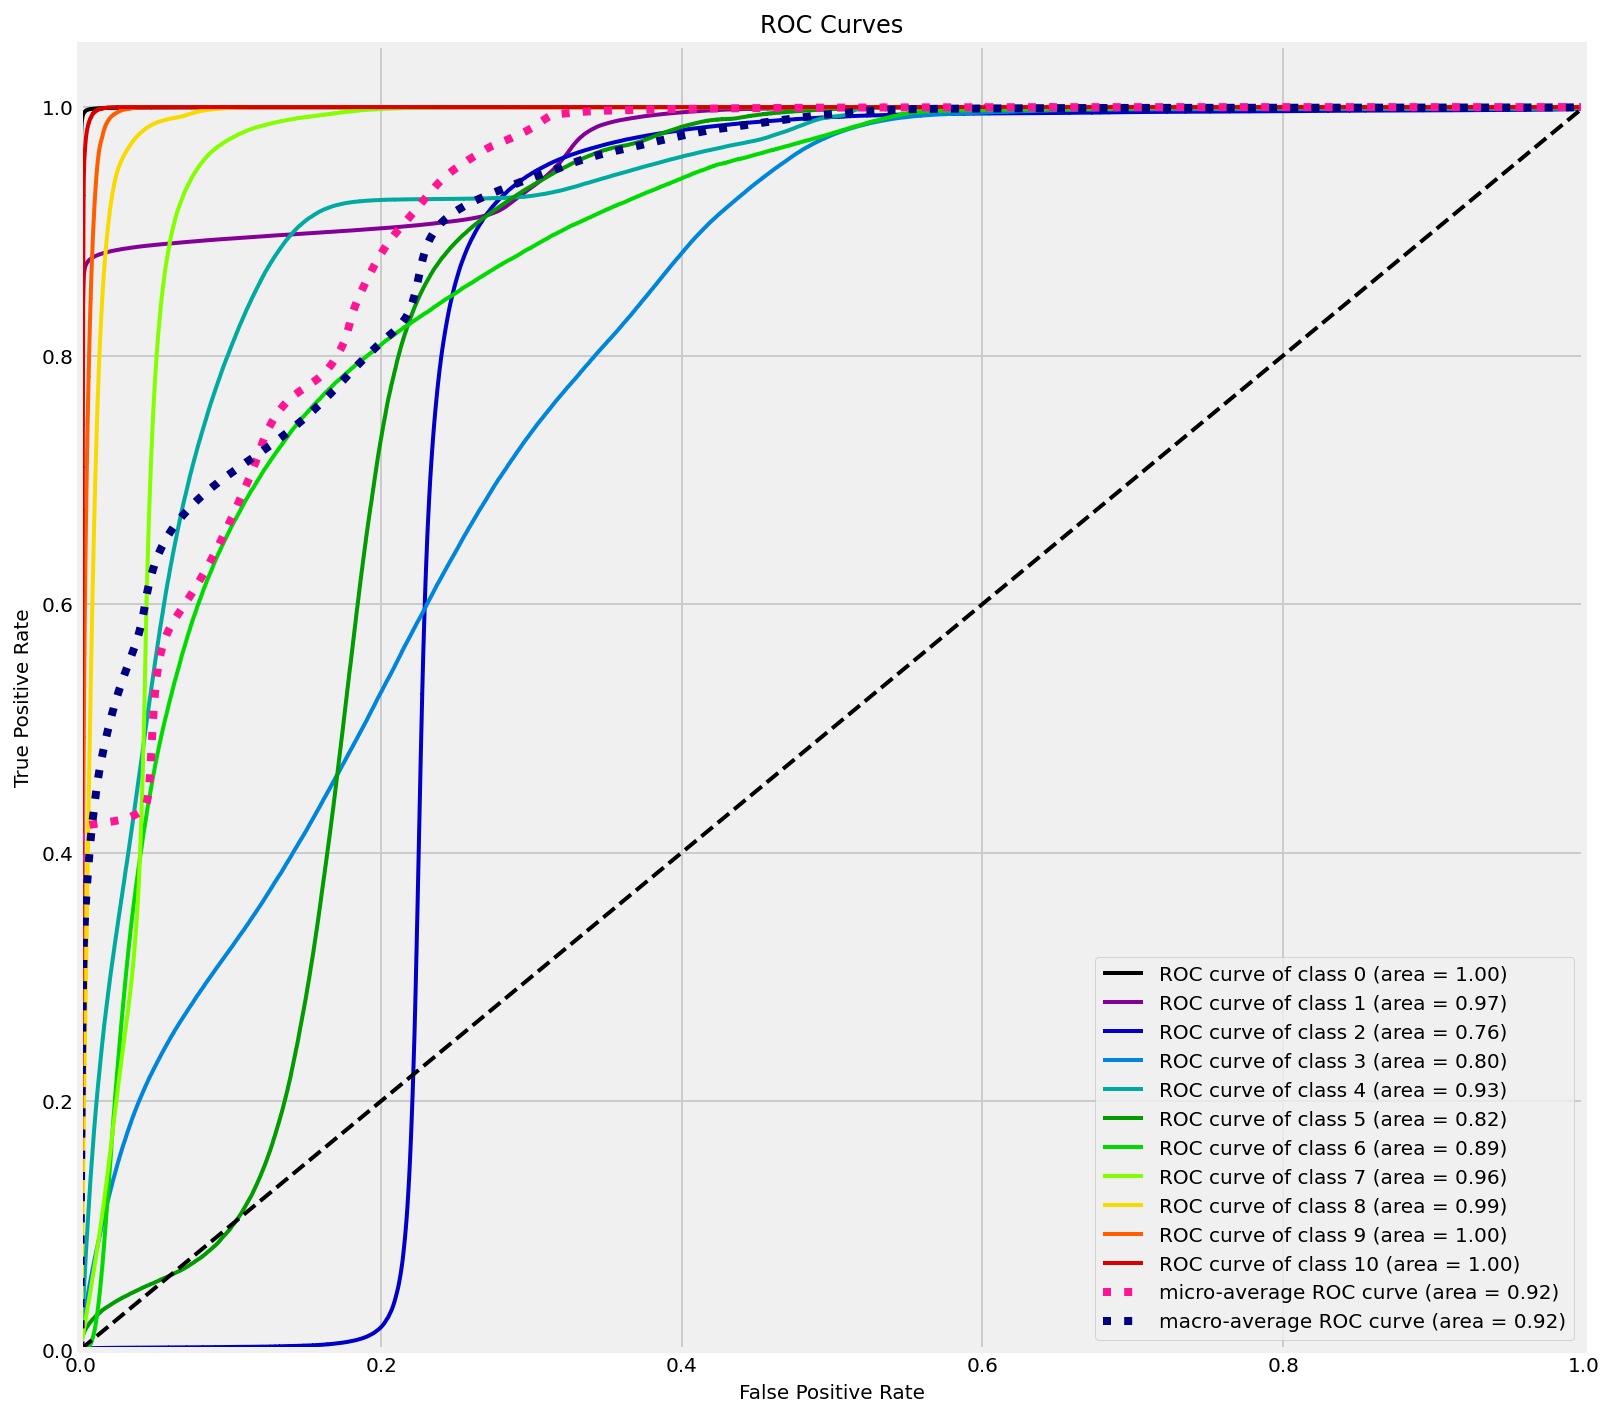

In [20]:
skplt.metrics.plot_roc(y1_train, probabilities2_train,figsize=(12,12))
plt.show()